<a href="https://colab.research.google.com/github/victorog17/Awari_ML/blob/main/C%C3%B3pia_de_atividade_visao_computacional_tl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import requests
url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz'
r = requests.get(url, allow_redirects=True)
open('imagenette2-160.tgz', 'wb').write(r.content)

99003388

In [ ]:
import sys, tarfile
def extract(tar_url, extract_path='.'):
    print(tar_url)
    tar = tarfile.open(tar_url, 'r')
    for item in tar:
        tar.extract(item, extract_path)
        if item.name.find(".tgz") != -1 or item.name.find(".tar") != -1:
            extract(item.name, "./" + item.name[:item.name.rfind('/')])
try:

    extract(sys.argv[1] + '.tgz')
    print('Done.')
except:
    name = os.path.basename(sys.argv[0])
    print(name[:name.rfind('.')], '<filename>')

-f.tgz
ipykernel_launcher <filename>


In [ ]:
extract('imagenette2-160.tgz')

imagenette2-160.tgz


In [ ]:
train_img_datagen = ImageDataGenerator(rescale=1./255)
val_img_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_img_datagen.flow_from_directory('imagenette2-160/train',
                                                 target_size=(160,160),
                                                 batch_size=64,
                                                 class_mode='categorical')

val_set = val_img_datagen.flow_from_directory('imagenette2-160/val',
                                                 target_size=(160,160),
                                                 batch_size=64,
                                                 class_mode='categorical')

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.ResNet50(input_shape=(160,160,3), include_top=False, weights='imagenet', pooling='avg')

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001, decay=1e-6), metrics=['accuracy'])

In [ ]:
try: 
    os.mkdir('./checkpoint')
except:
    pass

In [ ]:
file_name = 'best_model_tl.h5'
checkpoint_path = os.path.join('./checkpoint',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
model_info = model.fit(train_set, epochs=10, validation_data=val_set, callbacks=call_back)

Epoch 1/10
148/148 [==============================] - 2827s 19s/step - loss: 0.7356 - accuracy: 0.7925 - val_loss: 2.8314 - val_accuracy: 0.1042

Epoch 00001: val_accuracy improved from -inf to 0.10420, saving model to ./checkpoint/best_model_tl.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
148/148 [==============================] - 2843s 19s/step - loss: 0.3108 - accuracy: 0.9033 - val_loss: 2.8312 - val_accuracy: 0.0994

Epoch 00002: val_accuracy did not improve from 0.10420
Epoch 3/10
148/148 [==============================] - 2873s 19s/step - loss: 0.2414 - accuracy: 0.9220 - val_loss: 2.4369 - val_accuracy: 0.1027

Epoch 00003: val_accuracy did not improve from 0.10420
Epoch 4/10
148/148 [==============================] - 2887s 20s/step - loss: 0.2046 - accuracy: 0.9355 - val_loss: 2.3995 - val_accuracy: 0.2140

Epoch 00004: val_accuracy improved from 0.10420 to 0.21401, saving model to ./checkpoint/best_model_tl.h5
Epoch 5/10
148/148 [==============================] - 2873s 19s/step - loss: 0.1129 - accuracy: 0.9655 - val_loss: 1.4433 - val_accuracy: 0.5340

Epoch 00005: val_accuracy improved from 0.21401 to 0.53401, saving model to ./checkpoint/best_model_tl.h5
Epoch 6/10
148/148 [==============================] - 2866s 19s/step - loss: 0.0639 - accuracy

In [ ]:
#Saving the model
model.save('./model_tl.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# plots accuracy and loss curves
def plot_model_history(model_history):
    """
    Plot Accuracy and Loss curves given the model_history
    """
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


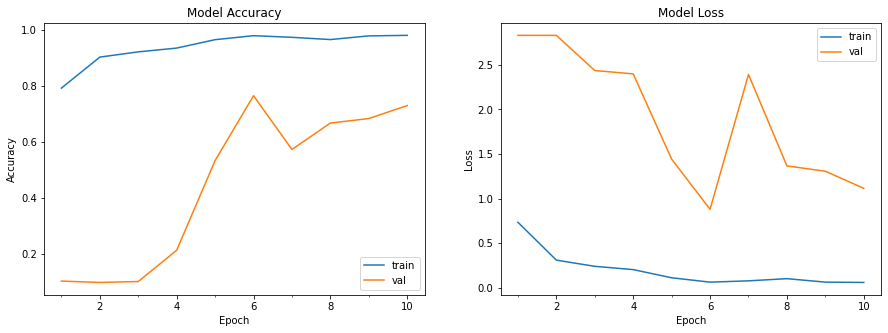

In [ ]:
plot_model_history(model_info)